## Student Admissions 

In [1]:
import pandas as pd 
import numpy as np 

data = pd.read_csv("student_data.csv")
data.head(10)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


### plotting the data

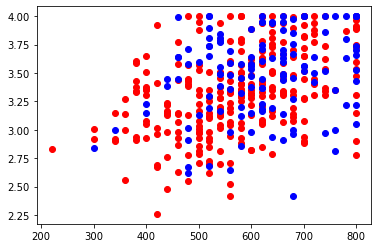

In [59]:
X=np.array(data[['gre', 'gpa']])
y=np.array(data[['admit']])

admitted=X[np.argwhere(y==1)]
rejected=X[np.argwhere(y==0)]

import matplotlib.pyplot as plt

for s in rejected:
    plt.scatter(s[0][0] , s[0][1] , c='red')
    
for s in admitted:
    plt.scatter(s[0][0] , s[0][1]  , c='blue')

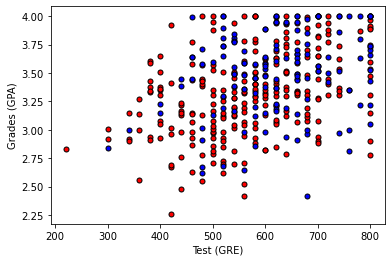

In [2]:
import matplotlib.pyplot as plt

# Function to help us plot
def plot_points(data):
    X = np.array(data[["gre","gpa"]])
    y = np.array(data["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'blue', edgecolor = 'k')
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')
    
# Plotting the points
plot_points(data)
plt.show()

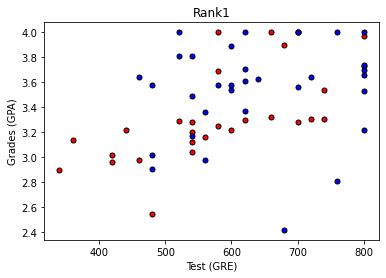

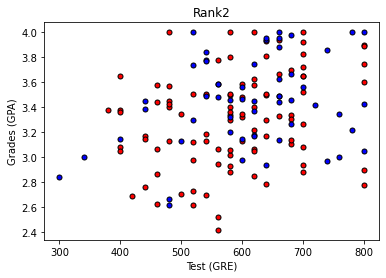

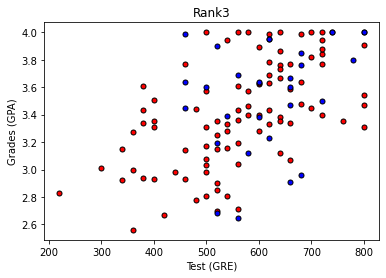

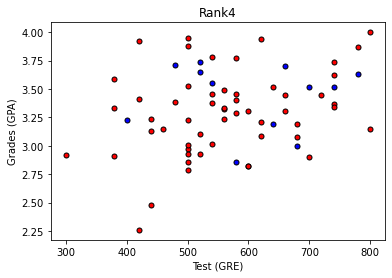

In [3]:
data_rank1 = data[data["rank"]==1]
data_rank2 = data[data["rank"]==2]
data_rank3 = data[data["rank"]==3]
data_rank4 = data[data["rank"]==4]

plot_points(data_rank1)
plt.title("Rank1")
plt.show()

plot_points(data_rank2)
plt.title("Rank2")
plt.show()

plot_points(data_rank3)
plt.title("Rank3")
plt.show()

plot_points(data_rank4)
plt.title("Rank4")
plt.show()



In [4]:
data['rank']

0      3
1      3
2      1
3      4
4      4
      ..
395    2
396    3
397    2
398    2
399    3
Name: rank, Length: 400, dtype: int64

In [5]:
from sklearn.preprocessing import OneHotEncoder
one_hot_data = pd.get_dummies(data , columns=["rank"])
one_hot_data.head()

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1


In [6]:
one_hot_data.columns

Index(['admit', 'gre', 'gpa', 'rank_1', 'rank_2', 'rank_3', 'rank_4'], dtype='object')

In [7]:
one_hot_data.describe().T

,count,mean,std,min,25%,50%,75%,max
admit,400.0,0.3175,0.466087,0.00,0.00,0.000,1.00,1.0
gre,400.0,587.7000,115.516536,220.00,520.00,580.000,660.00,800.0
gpa,400.0,3.3899,0.380567,2.26,3.13,3.395,3.67,4.0
rank_1,400.0,0.1525,0.359955,0.00,0.00,0.000,0.00,1.0
rank_2,400.0,0.3775,0.485369,0.00,0.00,0.000,1.00,1.0
rank_3,400.0,0.3025,0.459916,0.00,0.00,0.000,1.00,1.0
rank_4,400.0,0.1675,0.373889,0.00,0.00,0.000,0.00,1.0


C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

<AxesSubplot:ylabel='Density'>

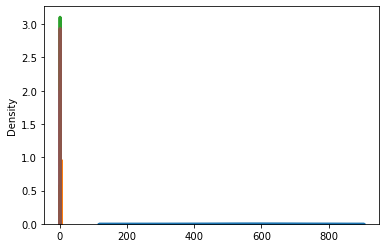

In [8]:
import seaborn as sns
sns.distplot(one_hot_data[['gre']] , hist=False , kde=True , kde_kws ={ 'shade' : True , 'linewidth' : 3})
sns.distplot(one_hot_data[['gpa']] , hist=False , kde= True , kde_kws={'shade': True , 'linewidth' : 3})
#sns.distplot(one_hot_data[['rank1']], hist=False , kde=True , kde_kws={'shade': True , 'linewidth': 3})

sns.distplot(one_hot_data[['rank_1']], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(one_hot_data[['rank_2']], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(one_hot_data[['rank_3']], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(one_hot_data[['rank_4']], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3})

In [9]:
# Making a copy of our data 
processed_data = one_hot_data[:]

# Now scaling the data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new = scaler.fit_transform(processed_data)
col_names=["admit","gre","gpa","rank_1","rank_2","rank_3","rank_4"]

processed_data=pd.DataFrame(columns=col_names, data = new)

processed_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0.0,0.275862,0.775862,0.0,0.0,1.0,0.0
1,1.0,0.758621,0.810345,0.0,0.0,1.0,0.0
2,1.0,1.000000,1.000000,1.0,0.0,0.0,0.0
3,1.0,0.724138,0.534483,0.0,0.0,0.0,1.0
4,0.0,0.517241,0.385057,0.0,0.0,0.0,1.0
5,1.0,0.931034,0.425287,0.0,1.0,0.0,0.0
6,1.0,0.586207,0.413793,1.0,0.0,0.0,0.0
7,0.0,0.310345,0.471264,0.0,1.0,0.0,0.0
8,1.0,0.551724,0.649425,0.0,0.0,1.0,0.0
9,0.0,0.827586,0.954023,0.0,1.0,0.0,0.0


C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

<AxesSubplot:ylabel='Density'>

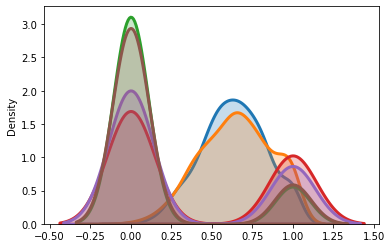

In [10]:
import seaborn as sns
sns.distplot(processed_data[['gre']] , hist=False , kde=True , kde_kws ={ 'shade' : True , 'linewidth' : 3})
sns.distplot(processed_data[['gpa']] , hist=False , kde= True , kde_kws={'shade': True , 'linewidth' : 3})
#sns.distplot(one_hot_data[['rank1']], hist=False , kde=True , kde_kws={'shade': True , 'linewidth': 3})

sns.distplot(processed_data[['rank_1']], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(processed_data[['rank_2']], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(processed_data[['rank_3']], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(processed_data[['rank_4']], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3})

# Splitting the data into Training and Testing

In [11]:
processed_data.index

RangeIndex(start=0, stop=400, step=1)

In [12]:
sample = np.random.choice(processed_data.index, size = int(len(processed_data)*0.8) , replace = False)
sample = np.random.choice(processed_data.index, size = int(len(processed_data)*0.8) , replace = False)
train_data, test_data = processed_data.iloc[sample], processed_data.drop(sample)

print("No. of training samples = ", len(train_data))
print("No.  of testing samples = ", len(test_data))

No. of training samples =  320
No.  of testing samples =  80


In [13]:
sample = np.random.choice(processed_data.index, size=int(len(processed_data)*0.8), replace=False)
train_data, test_data = processed_data.iloc[sample], processed_data.drop(sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))

print("\n Train Data\n\n", train_data[:10] ,"\n")
print("\n Test_Data\n\n ",test_data[:10] , "\n")

Number of training samples is 320
Number of testing samples is 80

 Train Data

      admit       gre       gpa  rank_1  rank_2  rank_3  rank_4
147    0.0  0.586207  0.258621     0.0     0.0     1.0     0.0
263    1.0  0.689655  0.971264     0.0     0.0     1.0     0.0
327    1.0  0.586207  0.701149     0.0     1.0     0.0     0.0
265    0.0  0.275862  0.620690     0.0     0.0     1.0     0.0
115    0.0  0.689655  0.994253     0.0     0.0     1.0     0.0
47     0.0  0.482759  0.408046     0.0     0.0     0.0     1.0
45     1.0  0.413793  0.683908     0.0     0.0     1.0     0.0
174    0.0  0.482759  0.729885     0.0     0.0     0.0     1.0
252    1.0  0.517241  1.000000     0.0     1.0     0.0     0.0
255    0.0  0.724138  0.626437     0.0     0.0     1.0     0.0 


 Test_Data

      admit       gre       gpa  rank_1  rank_2  rank_3  rank_4
0     0.0  0.275862  0.775862     0.0     0.0     1.0     0.0
1     1.0  0.758621  0.810345     0.0     0.0     1.0     0.0
4     0.0  0.517241  0.

## Splitting the Data into Features and Targets 

In [52]:
features = train_data.drop("admit" , axis=1)
targets = train_data["admit"]

features_test = test_data.drop("admit" , axis =1 )
targets_test = test_data["admit"]

In [15]:
X= processed_data.drop(['admit'] , axis=1)
y = processed_data[["admit"]]
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.10 , random_state=42)

print("Length of xtrain = " , len(X_train))
print("Length of xtest = " , len(X_test))

#print("X_train" , X_train)

#print("y_train" , y_train)


Length of xtrain =  360
Length of xtest =  40


In [127]:
X=processed_data.drop(['admit'], axis=1)
y= processed_data[["admit"]]
from sklearn.model_selection import train_test_split
X_train , X_test , y_test , ytrain = train_test_split(X,y , test_size=0.10 , random_state = 42)

print("Length of xtrain = ", len(X_train))
print("Length of xtest = ", len(X_test))
print("\n X_train \n\n" , X_train)
print("\n X_test \n\n" , X_test)

Length of xtrain =  360
Length of xtest =  40

 X_train 

           gre       gpa  rank_1  rank_2  rank_3  rank_4
381  0.551724  0.706897     0.0     1.0     0.0     0.0
55   0.896552  1.000000     0.0     0.0     1.0     0.0
76   0.586207  0.632184     0.0     0.0     1.0     0.0
25   1.000000  0.804598     1.0     0.0     0.0     0.0
82   0.482759  0.258621     0.0     1.0     0.0     0.0
..        ...       ...     ...     ...     ...     ...
71   0.137931  0.379310     0.0     0.0     0.0     1.0
106  0.827586  0.747126     1.0     0.0     0.0     0.0
270  0.724138  0.971264     0.0     1.0     0.0     0.0
348  0.310345  0.632184     0.0     1.0     0.0     0.0
102  0.275862  0.614943     0.0     0.0     0.0     1.0

[360 rows x 6 columns]

 X_test 

           gre       gpa  rank_1  rank_2  rank_3  rank_4
209  0.620690  0.712644     0.0     1.0     0.0     0.0
280  0.758621  0.965517     0.0     1.0     0.0     0.0
33   1.000000  1.000000     0.0     0.0     1.0     0.0
210  0.89

## Training the 2-Layer Neural Network

In [33]:
# Activation Function (Sigmoid Function )
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x)*(1-sigmoid(x))

def error_formula(y, output):
    return   -y*np.log(output) - (1-y)*np.log(1-output)
    
    

## Backpropagate the Error 

In [34]:
def error_term_formula(y , output):
    return -(y-output)*output*(1-output)

In [51]:
# Neural Network hyperparameters
epochs = 2500
learnrate = 1.0
# Training function 
def train_nn(features, targets , epochs , learnrate):
    np.random.seed(42)
    n_records , n_features = features.shape
    last_loss = None
    
    # Initialize weights 
    weights=np.random.normal(scale=1/n_features**.5 , size= n_features)
    for e in range(epochs):
        del_w=np.zeros(weights.shape)
        for x , y in zip(features.values,targets):
            output=sigmoid(np.dot(x,weights))
            # The error , the target minus the network output 
            error = error_formula(y, output)
            error_term = error_term_formula(y, output)
            del_w += error_term*x
        weights = weights - learnrate * del_w/n_records 
        
       
    if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean((out - targets) ** 2)
            print("Epoch:", e)
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            print("=========")
    print("Finished training!")
    return weights
    
weights = train_nn(features, targets , epochs , learnrate )


Finished training!


In [43]:
epochs = 2500
learnrate = 1.0

# Training function
def train_nn(features, targets, epochs, learnrate):
    
    np.random.seed(42)
    n_records, n_features = features.shape
    last_loss = None

    # Initialize weights
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features.values, targets):
            output = sigmoid(np.dot(x, weights))

            # The error, the target minus the network output
            error = error_formula(y, output)
            error_term = error_term_formula(y, output)
            del_w += error_term * x
            
        weights = weights - learnrate * del_w / n_records
        
        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean((out - targets) ** 2)
            print("Epoch:", e)
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            print("=========")
    print("Finished training!")
    return weights
    
weights = train_nn(features, targets, epochs, learnrate)

Epoch: 0
Train loss:  0.27021731568072227
Epoch: 250
Train loss:  0.21166460107241028
Epoch: 500
Train loss:  0.20719604585091894
Epoch: 750
Train loss:  0.20423276393569845
Epoch: 1000
Train loss:  0.20219766498562972
Epoch: 1250
Train loss:  0.20077226213099947
Epoch: 1500
Train loss:  0.1997556103962194
Epoch: 1750
Train loss:  0.1990187674163369
Epoch: 2000
Train loss:  0.1984772474403845
Epoch: 2250
Train loss:  0.19807447834998573
Finished training!
